#  Water Potability - EDA and Classification

##  Importing required Modules

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
import missingno as msno
import seaborn as sns
from collections import Counter

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from xgboost.sklearn import XGBClassifier

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Import Data

In [2]:
water_potability=pd.read_csv('water_potability.csv')
water_potability.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


####  Sum of NULL values in each column

In [3]:
water_potability.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
water_potability.shape

(3276, 10)

####  Understanding the Data

#####  Columns without NULLs

In [5]:
water_potability.dropna(axis=1) #axis 1 is for columns

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0
...,...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,526.424171,13.894419,4.435821,1
3272,193.553212,17329.802160,8.061362,392.449580,19.903225,2.798243,1
3273,175.762646,33155.578218,7.350233,432.044783,11.039070,3.298875,1
3274,230.603758,11983.869376,6.303357,402.883113,11.168946,4.708658,1


#####  Column Info

In [6]:
water_potability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
water_potability.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


##  Data Visualization 

In [8]:
x=water_potability.Potability.value_counts()
labels=[0,1]

####  Visualizing the Target Column

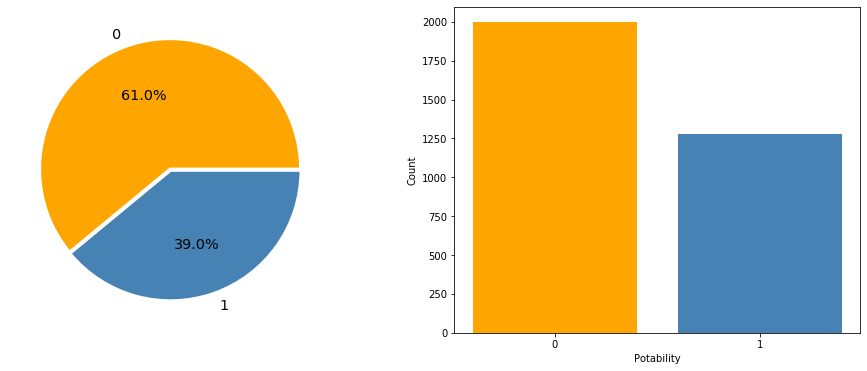

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,6))

ax[0].pie(x, 
        labels = labels,
        autopct = '%1.1f%%',
        colors=['orange', 'steelblue'], 
        explode = [0.005]*len(labels),
        textprops={'size': 'x-large'},
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})

ax[1].bar(labels,height=x,color=['orange', 'steelblue'])
ax[1].set_xlabel('Potability')
ax[1].set_ylabel('Count')
ax[1].set_xticks([0, 1])

plt.show()

This Data is Unbalanced.

####  Visualizing the Correlation between each column

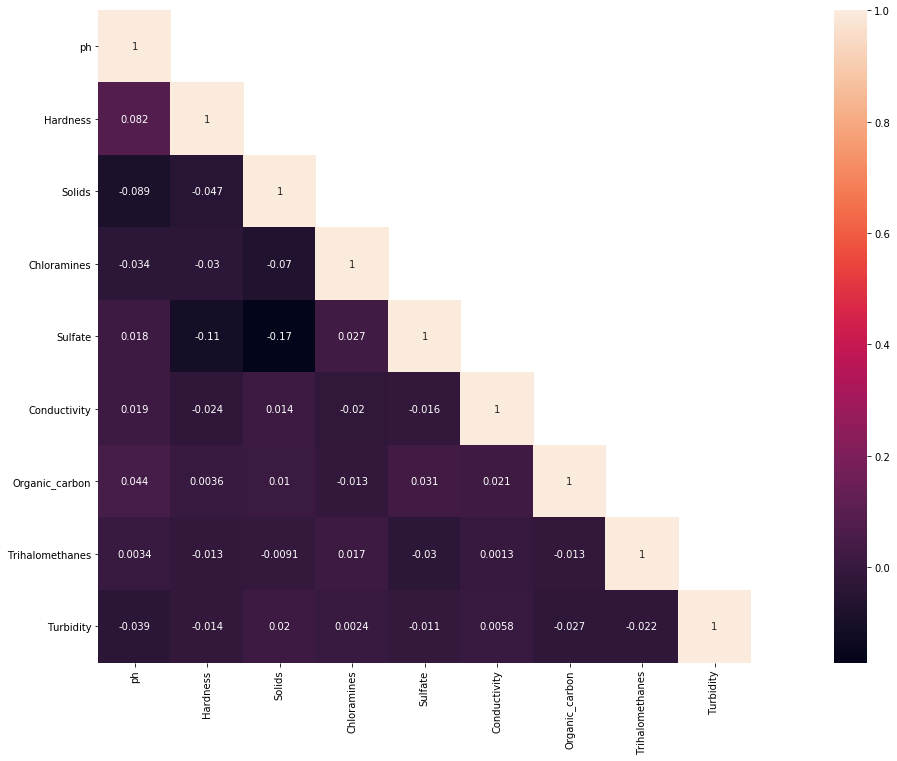

In [10]:
cor_mat = water_potability.iloc[:,:-1].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30, 12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

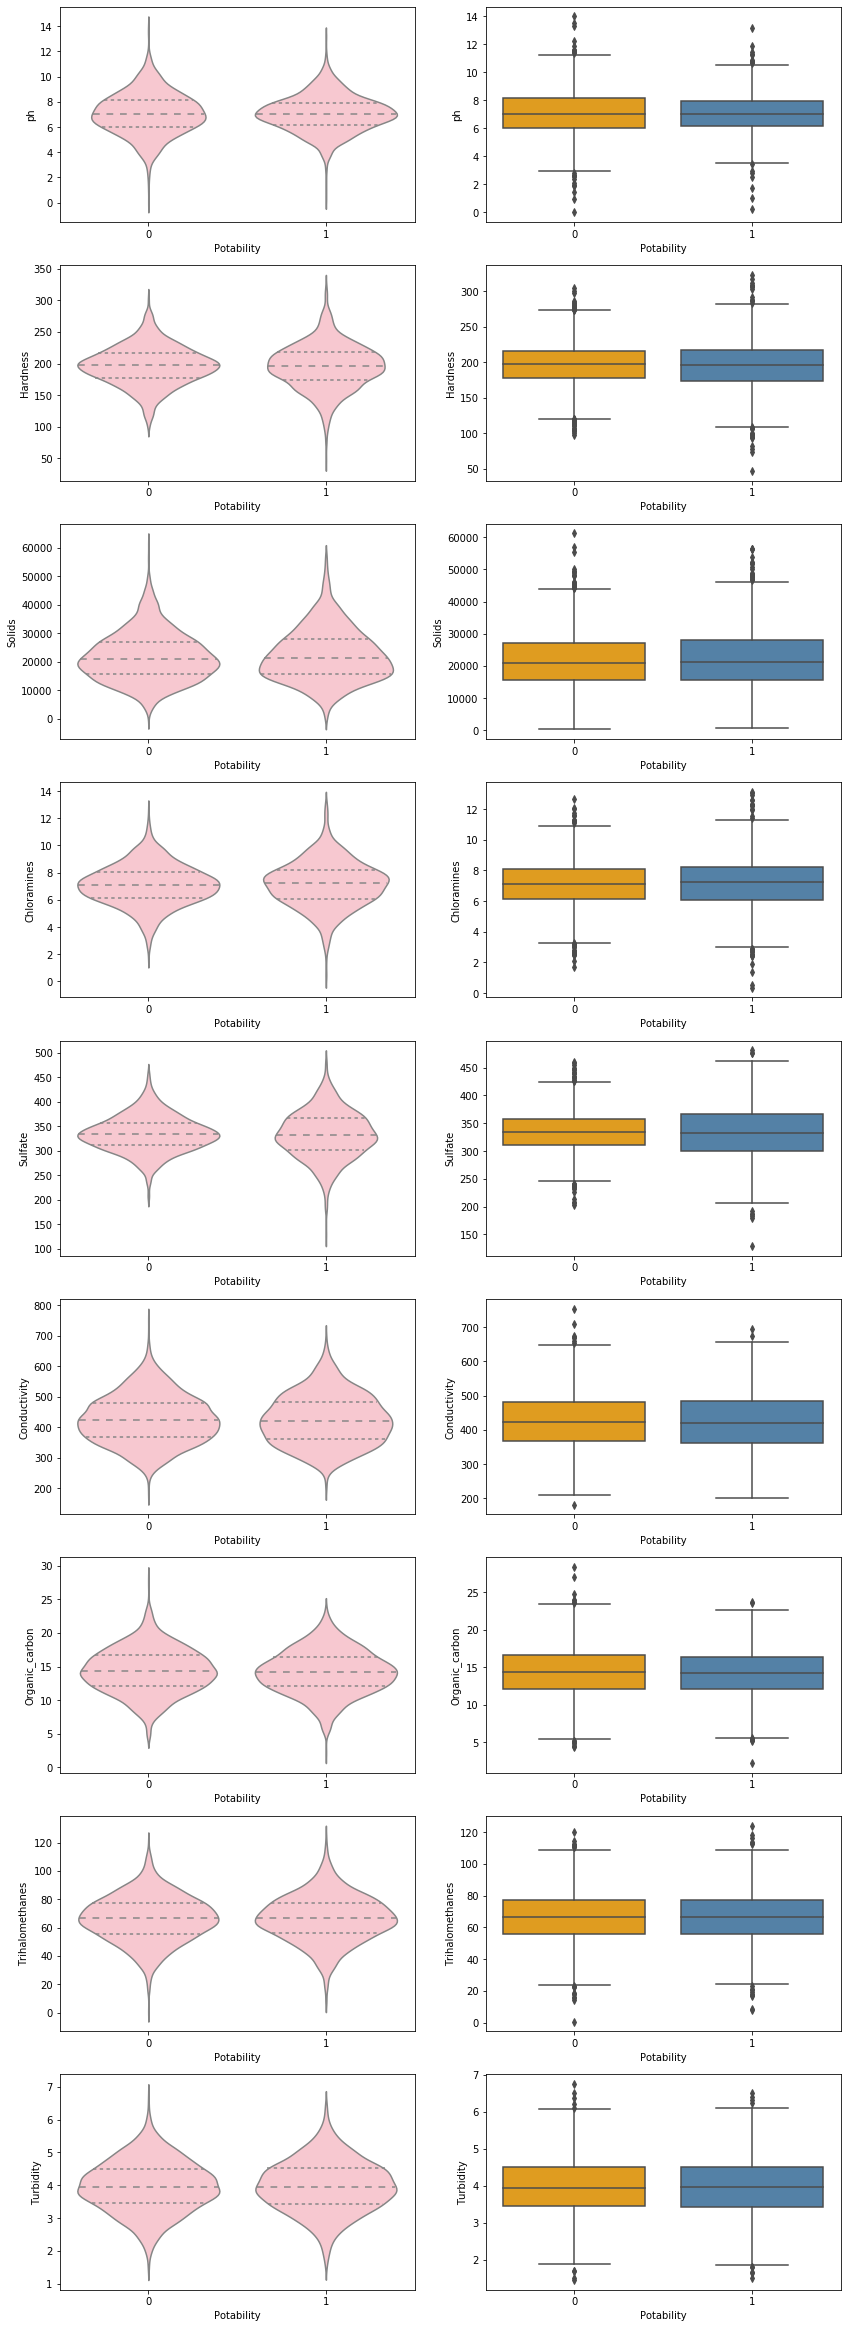

In [11]:
fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(14, 42))

features = list(water_potability.iloc[:,:-1].columns)  #or .drop('Potability')
target = 'Potability'
idx = 0

for col in features:
    sns.violinplot(data=water_potability, y=col, x=target, ax=ax[idx, 0],
                   inner='quartile', color='pink')
    
    sns.boxplot(data=water_potability, y=col, x=target, ax=ax[idx, 1],
                palette=('orange', 'steelblue'))
    
    idx += 1
plt.show()

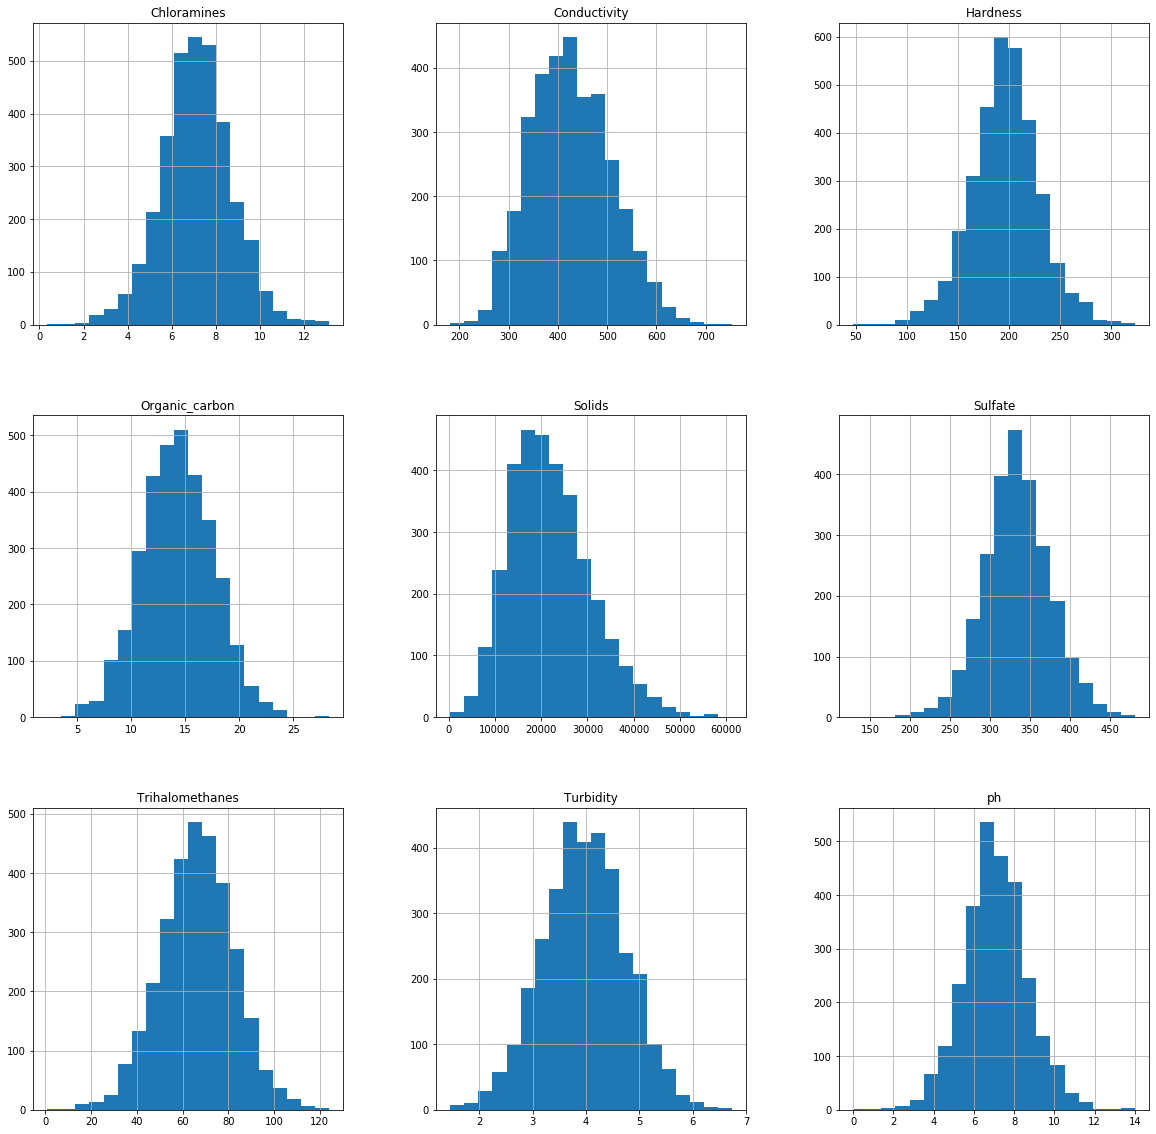

In [12]:
water_potability.iloc[:,:-1].hist(bins=20,figsize=(20,20))
plt.show()

### Handling Missing Values

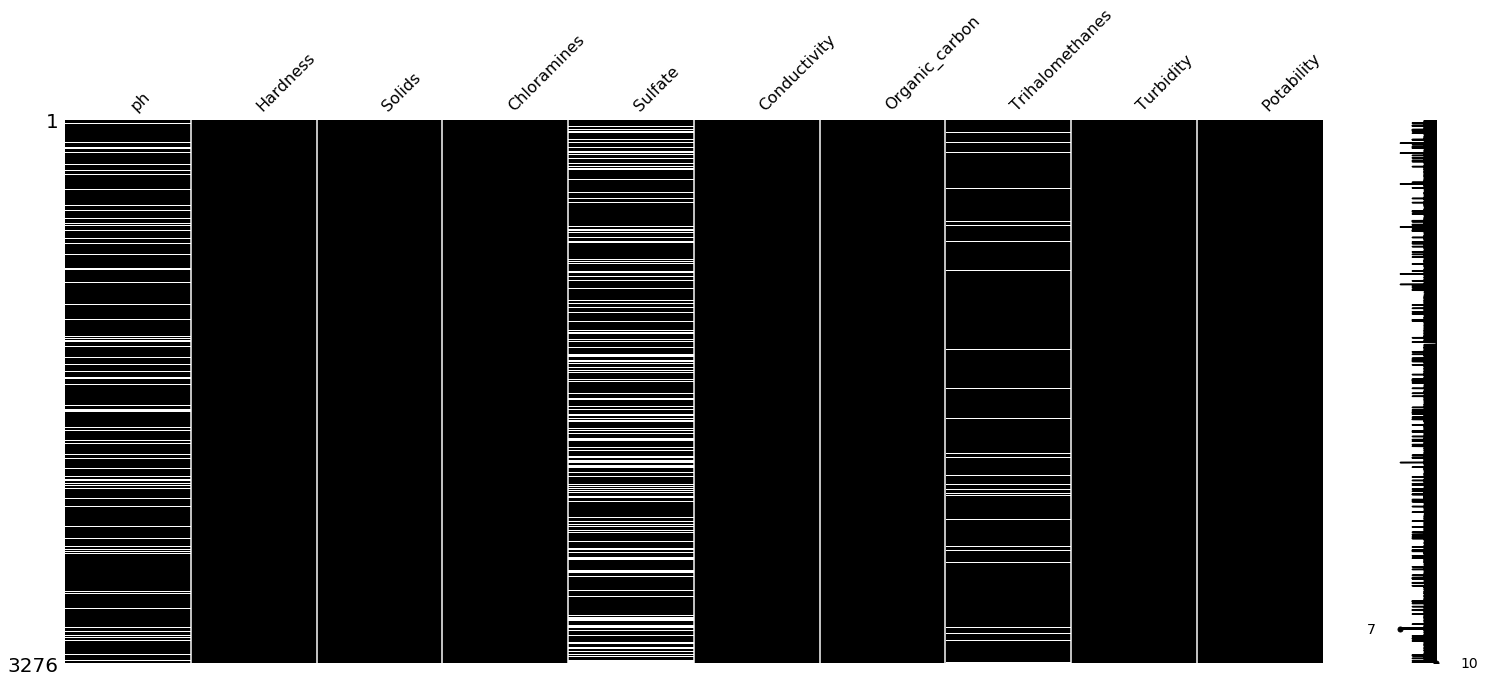

In [13]:
msno.matrix(water_potability, color=(0, 0, 0))


#####  Percentage of missing Values in wach column

In [14]:
water_potability.isnull().sum()/water_potability.shape[0]*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Ph- 15 percent  
Sulfate - 24 percent  
Trihalomethanes - 5 percent

####  Replace Missing Values with average of the Feature

In [15]:
phMean_0=water_potability.loc[(water_potability['Potability']==0)]['ph'].mean(skipna=True)
phMean_1=water_potability.loc[(water_potability['Potability']==1)]['ph'].mean(skipna=True)

In [16]:
SulphateMean_0=water_potability.loc[(water_potability['Potability']==0)]['Sulfate'].mean(skipna=True)
SulphateMean_1=water_potability.loc[(water_potability['Potability']==1)]['Sulfate'].mean(skipna=True)

In [17]:
TrihalMean_0=water_potability.loc[(water_potability['Potability']==0)]['Trihalomethanes'].mean(skipna=True)
TrihalMean_1=water_potability.loc[(water_potability['Potability']==1)]['Trihalomethanes'].mean(skipna=True)

In [18]:
water_potability.loc[(water_potability['ph'].isna()) & (water_potability['Potability']==0),'ph']=phMean_0
water_potability.loc[(water_potability['ph'].isna()) & (water_potability['Potability']==1),'ph']=phMean_1
water_potability.loc[(water_potability['Sulfate'].isna()) & (water_potability['Potability']==0),'Sulfate']=SulphateMean_0
water_potability.loc[(water_potability['Sulfate'].isna()) & (water_potability['Potability']==1),'Sulfate']=SulphateMean_1
water_potability.loc[(water_potability['Trihalomethanes'].isna()) & (water_potability['Potability']==0),'Trihalomethanes']=TrihalMean_0
water_potability.loc[(water_potability['Trihalomethanes'].isna()) & (water_potability['Potability']==1),'Trihalomethanes']=TrihalMean_0

####  Checking for Missing values (visually)

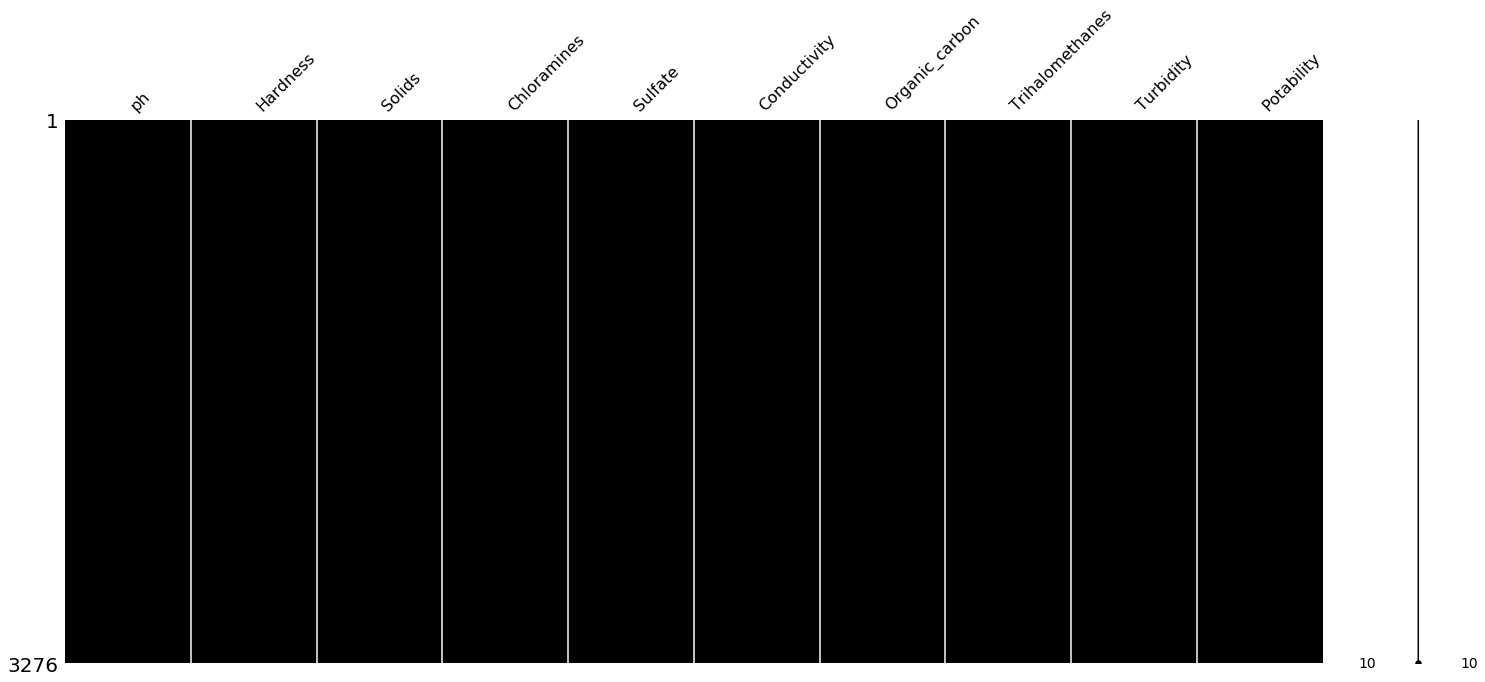

In [19]:
msno.matrix(water_potability,color=(0,0,0))

In [20]:
water_potability.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

There are ZERO missing values

####  Data Splitting for model building

In [21]:
X = water_potability.drop('Potability', axis=1)
y = water_potability.Potability

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(2620, 9) (656, 9)


### Oversampling the Minor label - Using Imbalanced Learn

In [22]:
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()

counter = Counter(y_train)
print('Before SMOTE', counter)

X_train, y_train = smt.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('\nAfter SMOTE', counter)

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({0: 1586, 1: 1034})

After SMOTE Counter({0: 1586, 1: 1586})


#### Fitting Data into Various Machine Learning Models

In [23]:
models = [LogisticRegression(), LinearSVC(), SVC(kernel='rbf'), KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB()]
model_names = ['LogisticRegression', 'LinearSVM', 'rbfSVM', 'KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier', 'GaussianNB']

acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models_name_acc = {'Modelling Algo': model_names, 'Accuracy': acc}

In [24]:
models_df=pd.DataFrame(models_name_acc)

#####  Accuracy comparision of all models

In [25]:
models_df

,Modelling Algo,Accuracy
0,LogisticRegression,0.510671
1,LinearSVM,0.371951
2,rbfSVM,0.560976
3,KNearestNeighbors,0.538110
4,RandomForestClassifier,0.785061
5,DecisionTree,0.728659
6,GradientBoostingClassifier,0.757622
7,GaussianNB,0.556402


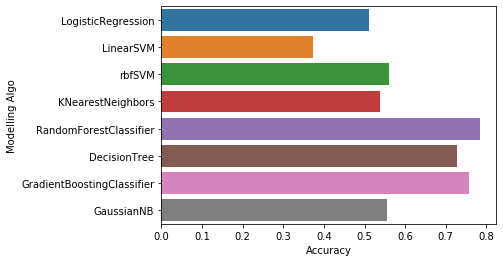

In [26]:

sns.barplot(x='Accuracy',y='Modelling Algo',data=models_df)

###  Feature Scaling

In [27]:
def feature_scaling(X_train, X_test, y_train, y_test, name_scaler):
    models = [LogisticRegression(), LinearSVC(), SVC(kernel='rbf'), KNeighborsClassifier(), RandomForestClassifier(),
              DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB()]

    acc_sc = []
    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_sc.append(accuracy_score(pred, y_test))

    models_df[name_scaler] = np.array(acc_sc)

In [28]:
scalers = [MinMaxScaler(), StandardScaler()]
names = ['Acc_Min_Max_Scaler', 'Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler = scalers[scale]

    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    feature_scaling(scaled_X_train, scaled_X_test, y_train, y_test, names[scale])

In [29]:
models_df

,Modelling Algo,Accuracy,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,LogisticRegression,0.510671,0.522866,0.519817
1,LinearSVM,0.371951,0.522866,0.519817
2,rbfSVM,0.560976,0.621951,0.631098
3,KNearestNeighbors,0.538110,0.576220,0.576220
4,RandomForestClassifier,0.785061,0.771341,0.778963
5,DecisionTree,0.728659,0.717988,0.728659
6,GradientBoostingClassifier,0.757622,0.756098,0.757622
7,GaussianNB,0.556402,0.557927,0.557927


In [30]:
ssc = StandardScaler()

X_train = ssc.fit_transform(X_train)
X_test = ssc.transform(X_test)

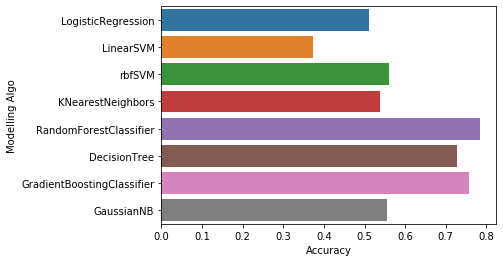

In [31]:
sns.barplot(y='Modelling Algo', x='Accuracy', data=models_df)


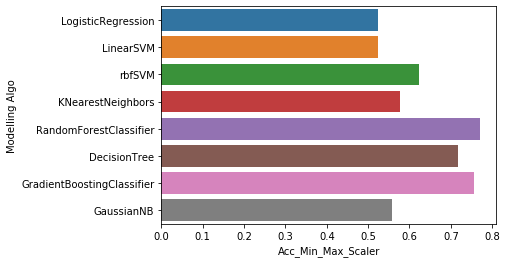

In [32]:
sns.barplot(y='Modelling Algo', x='Acc_Min_Max_Scaler', data=models_df)


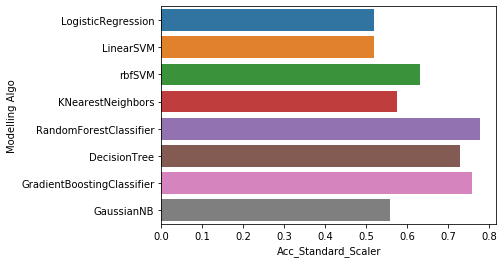

In [33]:
sns.barplot(y='Modelling Algo', x='Acc_Standard_Scaler', data=models_df)


###  Parameter Tuning and Model Selection

In [34]:
model, test_accuracy = [], []


####  For Logistic Regression

In [35]:
param_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

logreg_clf = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', cv=10)
logreg_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [36]:
logreg_clf.best_params_


{'C': 0.01, 'penalty': 'l2'}

In [37]:
logreg_clf.best_score_


0.4958901255877627

In [38]:
pred = logreg_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

model.append('LogisticRegression')
test_accuracy.append(accuracy)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.5213414634146342


In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.54      0.58       412
           1       0.39      0.50      0.44       244

    accuracy                           0.52       656
   macro avg       0.52      0.52      0.51       656
weighted avg       0.55      0.52      0.53       656



####  For SVM

In [40]:
param_grid = {'C': [0.98, 1.0, 1.2, 1.5, 2.0, 5.0], 
              'gamma': [0.50, 0.60, 0.70, 0.80, 0.90, 1.00], 
              'kernel': ['linear', 'rbf']}
# param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}



In [63]:
svm_clf = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=10)
# svm_clf.fit(X_train, y_train)

In [64]:
svm_clf.fit(X_train,y_train)

ValueError: Invalid parameter max_features for estimator SVC(). Check the list of available parameters with `estimator.get_params().keys()`.

####  KNN

In [42]:
param_grid = {'n_neighbors': [i+1 for i in range(50)], 'n_jobs': [-1]}

knn_clf = GridSearchCV(KNeighborsClassifier(),param_grid, scoring='accuracy', cv=10)
knn_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [44]:
knn_clf.best_params_

{'n_jobs': -1, 'n_neighbors': 1}

In [45]:
knn_clf.best_score_

0.6819117909648236

In [46]:
pred=knn_clf.predict(X_test)

accuracy=accuracy_score(y_test,pred)
model.append('KNN')
test_accuracy.append(accuracy)
print('KNN accuracy score: ',accuracy)

KNN accuracy score:  0.5899390243902439


In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65       412
           1       0.46      0.54      0.50       244

    accuracy                           0.59       656
   macro avg       0.58      0.58      0.57       656
weighted avg       0.61      0.59      0.60       656



####  Decision Tree

In [48]:
param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150]}

dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='accuracy', cv=10)
dt_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring='accuracy')

In [49]:
dt_clf.best_params_

{'criterion': 'gini', 'max_depth': 15}

In [50]:
dt_clf.best_score_

0.7310675951828264

In [51]:
pred=dt_clf.predict(X_test)

accuracy=accuracy_score(y_test,pred)

model.append("Decision Tree")
test_accuracy.append(accuracy)

print("Deecision Tree Accuracy: ",accuracy)

Deecision Tree Accuracy:  0.7271341463414634


In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       412
           1       0.62      0.69      0.65       244

    accuracy                           0.73       656
   macro avg       0.71      0.72      0.71       656
weighted avg       0.74      0.73      0.73       656



####  Random Forest Classifier

In [62]:
param_grid={'n_estimators':[100,200,300,400,500],'max_features':['auto','sqrt','log2']}

rf_clf=GridSearchCV(RandomForestClassifier(n_jobs=1),param_grid,scoring='accuracy',cv=10)



In [67]:
# rf_clf.fit(X_train,y_train)

In [68]:
# rf_clf.best_params_

In [69]:
# rf_clf.best_score_

In [70]:
# pred = rf_clf.predict(X_test)
# accuracy = accuracy_score(y_test, pred)

# model.append('Random Forest')
# test_accuracy.append(accuracy)
# print("Random Forest Accuracy:", accuracy)

In [ ]:
print(classification_report(y_test, pred))

####  Gradient Boosting

In [72]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700]}

gb_clf = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10)
# gb_clf.fit(X_train, y_train)

In [73]:
gb_clf.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
gb_clf.best_params_


In [ ]:
gb_clf.best_score_


In [ ]:
pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

model.append('Gradient Boosting')
test_accuracy.append(accuracy)
print("Gradient Boosting Accuracy:", accuracy)

In [ ]:
print(classification_report(y_test, pred))


####  Adaboost Classifier

In [74]:
param_dict = {'n_estimators': list(range(1, 201, 20))}

adaboost_clf = GridSearchCV(
    AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=1000),  algorithm='SAMME.R'),
    param_grid)
adaboost_clf.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1000)),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700]})

In [75]:
adaboost_clf.best_params_


{'n_estimators': 300}

In [76]:
adaboost_clf.best_score_


0.7288785116371495

In [77]:
pred = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

model.append('Adaboost')
test_accuracy.append(accuracy)
print("Adaboost Accuracy:", accuracy)

Adaboost Accuracy: 0.7210365853658537


In [78]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.80      0.74      0.77       412
           1       0.61      0.68      0.65       244

    accuracy                           0.72       656
   macro avg       0.71      0.71      0.71       656
weighted avg       0.73      0.72      0.72       656



#### XGBoost

In [80]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700], 'eval_metric': ['mlogloss']}

xg_boost = GridSearchCV(XGBClassifier(), param_grid)
# xg_boost.fit(X_train, y_train)

In [ ]:
xg_boost.best_params_

In [ ]:
xg_boost.best_score_


In [ ]:
pred = xg_boost.predict(X_test)
accuracy = accuracy_score(y_test, pred)

model.append('XGBoost')
test_accuracy.append(accuracy)
print("XGBoost Accuracy:", accuracy)

###  Final Evaluation

In [81]:
evalutation = pd.DataFrame({
    'Model': model,
    'Accuracy': test_accuracy
})

In [82]:

evalutation


,Model,Accuracy
0,LogisticRegression,0.521341
1,KNN,0.589939
2,Decision Tree,0.727134
3,Adaboost,0.721037
